In [3]:
from scipy import signal

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
Vin = 20
Vout = 8.4
Iout = 5
fs = 1e6
Lout=2.2e-6

In [30]:
duty = Vout/Vin
Ipp = (Vin-Vout)*duty/fs/Lout
Iin_avg = Vout*Iout/Vin

In [31]:
print("dutycycle: %3.2f,  Ipp: %3.1f" % (duty, Ipp))

dutycycle: 0.42,  Ipp: 2.2


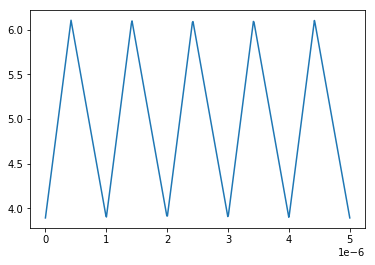

In [32]:
cycles=5
datapoints=np.linspace(0,1,500)
t=datapoints/fs*cycles
I_inductor=signal.sawtooth(2*np.pi*datapoints*cycles,duty)/2*Ipp+Iload
plt.plot(t,I_inductor)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [33]:
D_pulse = signal.square(2*np.pi*datapoints*cycles,duty)/2+.5

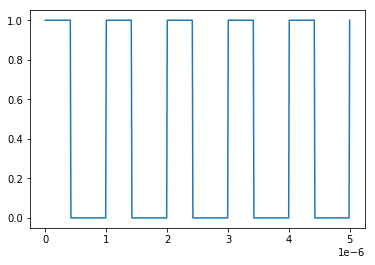

In [34]:
plt.plot(t,D_pulse)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [35]:
I_HSfet = D_pulse*I_inductor
I_LSfet = (1-D_pulse)*I_inductor

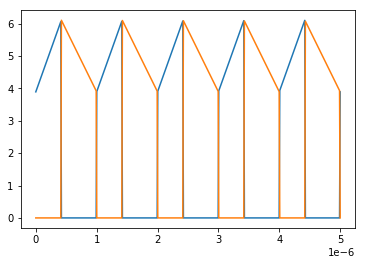

In [36]:
plt.plot(t,I_HSfet)
plt.plot(t,I_LSfet)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [37]:
I_Cin = I_HSfet - Iin_avg
I_Cout = I_inductor - Iout

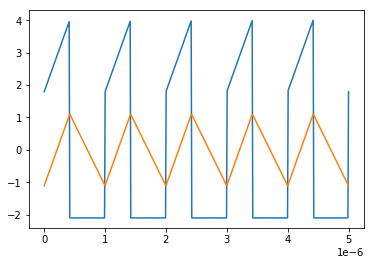

In [38]:
plt.plot(t,I_Cin)
plt.plot(t,I_Cout)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))